### The BHC Company synthesis of ibuprofen (1990's)

CC(C)Cc1ccccc1.CC(=O)OC(C)=O>F>CC(=O)c1ccc(CC(C)C)cc1\
CC(=O)c1ccc(CC(C)C)cc1.[HH]>Ni-Raney>CC(C)Cc1ccc(C(C)O)cc1\
CC(C)Cc1ccc(C(C)O)cc1.[C-]#[O+]>Pd>CC(C)Cc1ccc(C(C)C(=O)O)cc1

In [8]:
from rxnSMILES4AtomEco import atom_economy

#use triple quotes (""") to define a multiline string
reactions_smiles = """CC(C)Cc1ccccc1.CC(=O)OC(C)=O>F>CC(=O)c1ccc(CC(C)C)cc1
CC(=O)c1ccc(CC(C)C)cc1.[HH]>Ni-Raney>CC(C)Cc1ccc(C(C)O)cc1
CC(C)Cc1ccc(C(C)O)cc1.[C-]#[O+]>Pd>CC(C)Cc1ccc(C(C)C(=O)O)cc1"""
atom_economy(reactions_smiles)


 Atom Economy Calculation: 

--------------------------------------------------
                     REACTANTS                    
..................................................
 SMILES:             CC(C)Cc1ccccc1
 Molecular Formula:  C10H14
 Molecular Weight:   134.22 g/mol
 Coefficient:        1.0
..................................................
 SMILES:             CC(=O)OC(C)=O
 Molecular Formula:  C4H6O3
 Molecular Weight:   102.09 g/mol
 Coefficient:        1.0
..................................................
 SMILES:             [HH]
 Molecular Formula:  H2
 Molecular Weight:   2.02 g/mol
 Coefficient:        1.0
..................................................
 SMILES:             [C-]#[O+]
 Molecular Formula:  CO
 Molecular Weight:   28.01 g/mol
 Coefficient:        1.0
--------------------------------------------------
--------------------------------------------------
                     PRODUCTS                     
..............................................

---
Calculate atom economy for individual synthesis steps

---

In [11]:
from rxnSMILES4AtomEco import get_atom_economy
# value = get_atom_economy(reactions_smiles)
# print(value)

# Split reactions_smiles into lines
lines = reactions_smiles.splitlines()

# Create a dictionary to store the results
results_individual = {}

# Loop through each line and call get_atom_economy for each one
for i, line in enumerate(lines):
    step_key = f"step_{i+1}"  # Create step_1, step_2, ..., step_n
    results_individual[step_key] = get_atom_economy(line)  # Call your function and store the result

# Now, 'results' contains the results for each line, e.g., results["step_1"], results["step_2"], etc.

# Example: Print all results
for step, result_individual in results_individual.items():
    print(f"{step}: {result_individual}")


step_1: 74.5877254973319
step_2: 100.0
step_3: 100.0


---
Calculate atom economy for cumulative synthesis steps

---

In [14]:
# Split reactions_smiles into lines
lines = reactions_smiles.splitlines()

# Create a dictionary to store the results
results_cumulative = {}

# Loop through each incremental combination of lines and call get_atom_economy
for i in range(1, len(lines) + 1):  # Start from 1 to n
    # Get the first i lines
    combined_reactions = "\n".join(lines[:i])
    
    # Call get_atom_economy with the combined lines up to the current step
    step_key = f"step_{i}"
    results_cumulative[step_key] = get_atom_economy(combined_reactions)  # Store the result
    
    # Example: Print the current step's result
    print(f"{step_key}: {results_cumulative[step_key]}")


step_1: 74.5877254973319
step_2: 74.8026870644115
step_3: 77.45262580865594


---
Multiplot of individual and cumulative atom economy

---

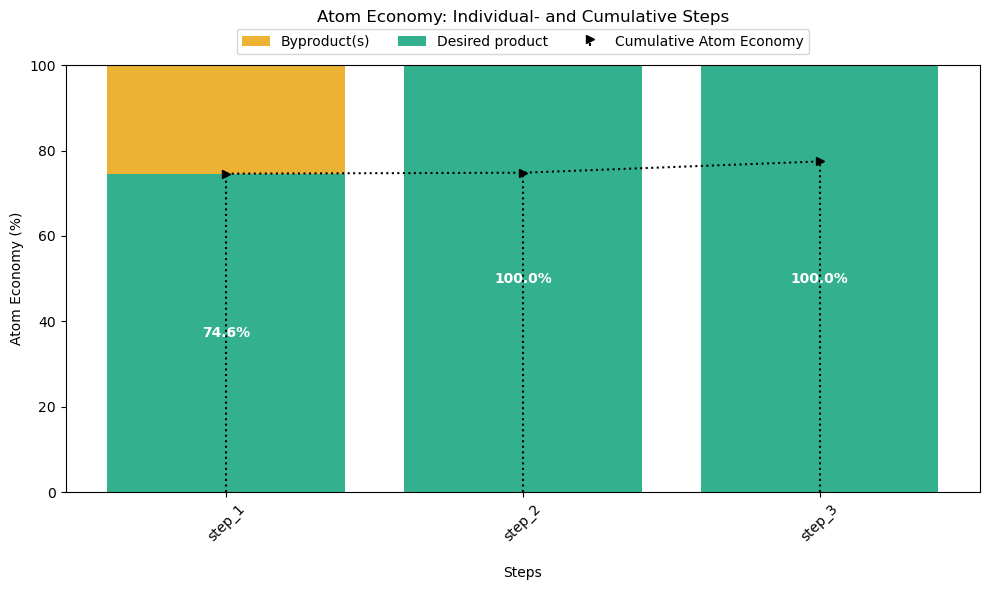

In [20]:
import matplotlib.pyplot as plt

# Assuming you already have 'results_individual' and 'results_cumulative' dictionaries

# Create a single plot
fig, ax = plt.subplots(figsize=(10, 6))  # Single axis for both plots

# Extract the steps (x-axis) and Atom Economy values (y-axis) for both individual and cumulative
steps = list(results_individual.keys())  # Step names: ['step_1', 'step_2', ...]
individual_values = list(results_individual.values())  # Atom Economy values for individual reactions
cumulative_values = list(results_cumulative.values())  # Atom Economy values for cumulative reactions

# Calculate the Byproduct(s) as the difference between 100% and the desired product
byproduct_values = [100 - value for value in individual_values]

# Plot the stem plot for cumulative Atom Economy values in black
ax.stem(steps, cumulative_values, linefmt='k:', markerfmt='k>:', basefmt=" ", label="Cumulative Atom Economy")

# Bar plot for individual Atom Economy values
bars = ax.bar(steps, individual_values, color='#009E73', label="Desired product", alpha=0.8)  # Green bars
ax.bar(steps, byproduct_values, bottom=individual_values, color='#E69F00', label="Byproduct(s)", alpha=0.8)  # Orange stacked bars

# Add the text (value of desired product) in white in the middle of each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{height:.1f}%', 
             ha='center', va='center', color='white', fontweight='bold')

# Add labels and titles
ax.set_title('Atom Economy: Individual- and Cumulative Steps\n\n')
ax.set_xlabel('\nSteps')
ax.set_ylabel('Atom Economy (%)')
ax.set_ylim(0, 100)  # Set Y-axis from 0 to 100%
ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Add the legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3,reverse=True)

# Improve layout to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()
